# Duplicate Data Detection and Cleaning in Survey Datasets

In [82]:
# Step 1: Instal & import required libraries
!pip install pandas
!pip install matplotlib

# Importing Pandas for Data Analysis
import pandas as pd

# Importing Matplotlib for Data Visualization
import matplotlib.pyplot as plt

In [83]:
# Step 2:  Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Step 3: Read data into pandas data frame
df = pd.read_csv(file_path)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [84]:
# Step 4: Idenify the structure of data
df.shape

(65457, 114)

### *** Key Insights:
The dataset is a "survey about people "who code or are learning to code
  * Each row represents one person’s survey answers
  * The data includes information such as:
  *  Whether they are a "developer or student"
  *  Their "age group and employment status"
  *  Whether they work "remotely or not"
  *  How they "learn coding" (books, online, tutorials, etc.)
  *  Some answers are missing 

# ***** Identify and Analyze Duplicates *****

## Task 1: Identify Duplicate Rows

In [85]:
# Step 5: Count the Number of Duplicate Rows in the Dataset
duplicate_count= df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 20


In [86]:
# step 6: Display the first few duplicate rows

df_duplicate =df[df.duplicated()]
print("\nSample duplicated rows:")
print(df_duplicate.head(3))




Sample duplicated rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   

                                               EdLevel  \
65437                        Primary/elementary school   
65438     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
65439  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

           

### *** Key Insights:
Filtered the dataset and returned only the rows that are duplicates.

## Task 2: Analyze Characteristics of Duplicates

### --------Identifying Duplicate Rows Using Selected Columns-----------


In [87]:
# Step 7:  Identifying Duplicate Rows Using Selected Columns
df_dup_subset = df[df.duplicated(
                 subset=["MainBranch", "Employment", "RemoteWork"],
                 keep=False)]
df_dup_subset.head()



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Key Insights:
* We checked duplicates using only MainBranch, Employment, and RemoteWork.
* This dataset contains only rows that belong to duplicate groups.
* The rows look similar because they have the same role and work pattern.
* However, other details (like age or education) may be different.
* This means the rows represent different people with similar profiles, not repeated survey entries.

In [88]:
#Step 8:  Display column names clearly
for col in df_dup_subset.columns:
    print(col)



ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [89]:
# Step 9: Count how many rows are duplicates (based on the 3 columns)
dup_subset_count=len(df_dup_subset)
print("Number of rows matching duplicate combinations:", dup_subset_count)



Number of rows matching duplicate combinations: 65290


## ----------Finding Frequently Repeated Column Values in Duplicates-----------

In [90]:
# Step 10: Identifying Which Columns Share Repeated Values in Duplicate Records

# 9.1: Create an empty dictionary
column_similarity = {}

# 9.2: Loop through each column in duplicate rows
for col in df_dup_subset.columns:
    top_value_count = df_dup_subset[col].value_counts(dropna=False).max()   # Find the most common value in that column
    similarity_ratio =   top_value_count /  len (df_dup_subset)             # Calculate the Percentage of Rows Sharing the Same Value in This Column
    column_similarity[col] = similarity_ratio       # Save the similarity score for this column name in the dictionary.
    
# 9.3: Convert results into a sorted table
similarity_report = (
    pd.DataFrame.from_dict(column_similarity, orient="index", columns=["Similarity_Ratio"])
    .sort_values(by="Similarity_Ratio", ascending=False)
)

# 9.4: Show top 10 most similar columns
print(similarity_report.head(10))




                            Similarity_Ratio
Check                               1.000000
AINextMuch less integrated          0.982555
AINextLess integrated               0.964083
AINextNo change                     0.809037
AINextMuch more integrated          0.794701
MainBranch                          0.768464
EmbeddedAdmired                     0.744463
EmbeddedWantToWorkWith              0.731215
SOAccount                           0.694946
EmbeddedHaveWorkedWith              0.660775


### Key Insights:
* Some columns have values that repeat very often in duplicate rows.
* The “Check” column has 100% the same value in all duplicate rows.
* The AI opinion columns also repeat a lot (about 95–98% similar).
* The MainBranch column is about 77% similar, meaning many people have the same job role.
* Other columns have lower similarity, meaning their values are more different.

## Task 3: Visualize Duplicates Distribution

### ----------------Bar Chart — Duplicates by Employment Type------------

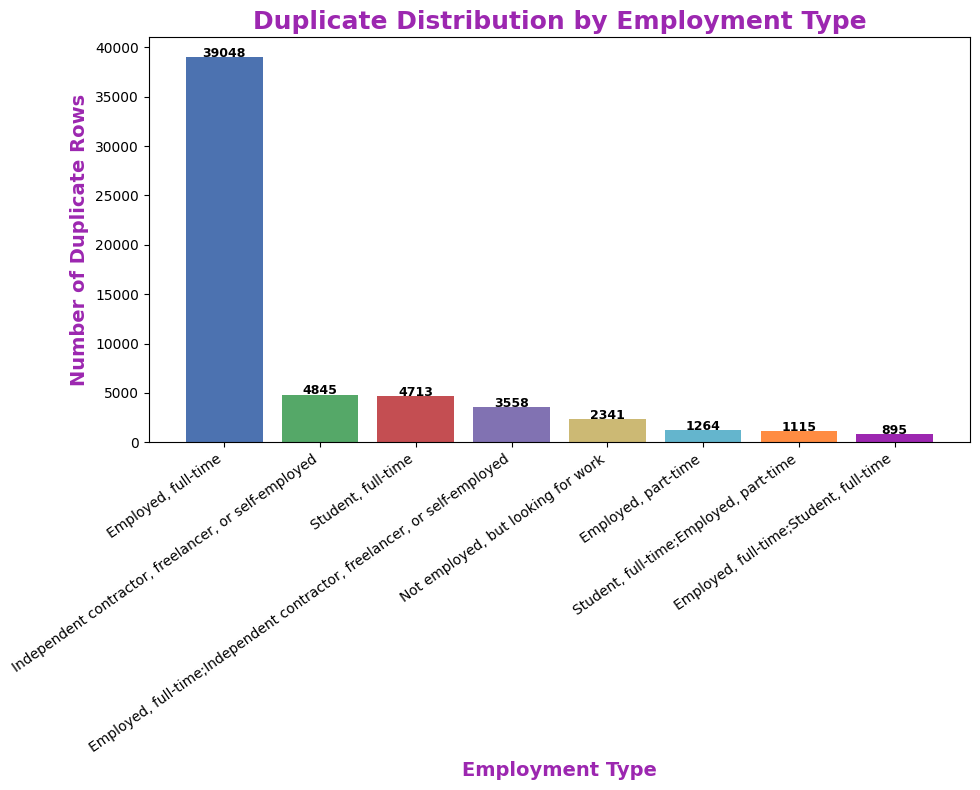

In [91]:
# Step 11: Bar Chart — Duplicates by Employment Type



# Sort & limit to top categories (make it cleaner)
dup_by_employment = df_dup_subset["Employment"].value_counts().head(8)

# 10.1: Figure size
plt.figure(figsize=(10,8))

# Define custom colors
colors = ["#4C72B0","#55A868","#C44E52","#8172B2",
          "#CCB974","#64B5CD","#FF8C42","#9C27B0"]


# Create the bar chart
bars = plt.bar(
    dup_by_employment.index,
    dup_by_employment.values,
    color=colors
)

# Title & labels
plt.title("Duplicate Distribution by Employment Type", fontsize=18, weight="bold", color="#9C27B0")
plt.xlabel("Employment Type", fontsize=14,color="#9C27B0", weight="bold")
plt.ylabel("Number of Duplicate Rows", fontsize=14,color="#9C27B0", weight="bold")

# Rotate and align labels
plt.xticks(rotation=35, ha="right", fontsize=10)

# Add value labels on bars
for bar in bars:          # Loop through each bar
    y = bar.get_height()  # Get the height (value) of each bar
    plt.text(
        bar.get_x() + bar.get_width()/2,
        y + 2,
        int(y),
        ha="center",
        fontsize=9,
        weight="bold"
    )

# Reduce empty space and improve layout
plt.tight_layout()
plt.show()


### Key Insights:
* Most duplicate rows come from Employed, full-time users.
* A smaller number of duplicates are seen in:
    * Freelancers / contractors
    * Full-time students
    * Self-employed people
    * Unemployed (looking for work)
* Very few duplicates appear in part-time workers.
* This means duplicates are mainly found among working professionals, especially full-time employees.

### -----------------Pie Chart — Duplicates by Country (Top 10 )--------------

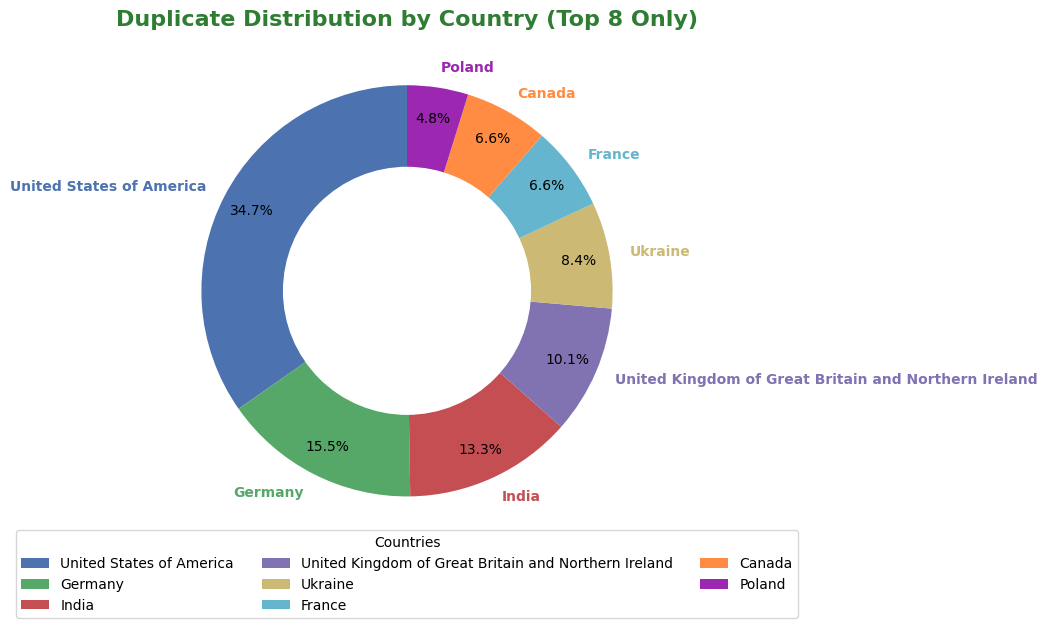

In [92]:
# Step 12: Top 8 Countries with the Highest Number of Duplicate Records

dup_by_country = df_dup_subset["Country"].value_counts().head(8)

colors = [
    "#4C72B0","#55A868","#C44E52","#8172B2",
    "#CCB974","#64B5CD","#FF8C42","#9C27B0"
]

plt.figure(figsize=(10,10))     # Width = 10 units, Height = 10 units


wedges, texts, autotexts = plt.pie(         # wedges= pie slices, texts=the labels (category names), autotexts=percentage labels
    dup_by_country.values,
    labels=dup_by_country.index,
    colors=colors,
    autopct="%1.1f%%",         # Shows percentage values on the slices
    startangle=90,
    pctdistance=0.85           # Controls how far % text sits from center
)

# Donut hole
centre_circle = plt.Circle((0,0),0.60,color="white")  # creates a white circle.
plt.gca().add_artist(centre_circle)                   # Add the circle to the plot

#  Make label color match slice color
for t, c in zip(texts, colors):
    t.set_color(c)
    t.set_fontweight("bold")

#  Move legend below chart
plt.legend(
    wedges,
    dup_by_country.index,
    title="Countries",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)

plt.title(
    "Duplicate Distribution by Country (Top 8 Only)",
    fontsize=16,
    weight="bold",
    color="#2E7D32"
)

plt.ylabel("")
plt.tight_layout()
plt.show()



### Key Insights:
* The United States has the highest number of duplicate records (largest share).
* The next highest countries are:
   * Germany
   * India
   * United Kingdom
* Ukraine, France, Canada, and Poland contribute smaller shares of duplicates.

## Task 4: Strategic Removal of Duplicates

### ----------Removing Duplicates Using Selected Key Columns-----------

In [93]:
# Step 13: Removing Duplicates Using Selected Key Columns

# 13.1: Choose Columns That Define Uniqueness
subset = ["MainBranch", "Employment", "RemoteWork"]

# 13.2: Remove Duplicates Using Only Those Columns
df_cleaned = df.drop_duplicates( 
             subset= ["MainBranch", "Employment", "RemoteWork"],
             keep= "first"
)

df_cleaned = df.drop_duplicates(
    subset=["MainBranch", "Employment", "RemoteWork"],
    keep="first"
)

print("Rows before cleaning:", len(df))
print("Rows after cleaning:", len(df_cleaned))


Rows before cleaning: 65457
Rows after cleaning: 561


### Key Insights:
MainBranch, Employment, RemoteWork - These columns represent key respondent details, so repeated values here likely indicate duplicate responses.

* Original dataset size: 65,457 rows
* After duplicate removal: 561 unique rows
* This means most rows in the dataset were repeated profile patterns rather than unique records.

## Task 5: Documentation

## ----------Process of Identifying and Removing Duplicates---------


   
1. First, duplicate records were identified in the dataset.
2. Instead of checking full-row duplicates, duplicates were detected based on key profile-defining columns:
  * MainBranch
  * Employment
  * RemoteWork
3. These columns were used to identify rows that represent the same respondent profile.

Duplicate rows were detected and then removed using:

df_cleaned = df.drop_duplicates(
    subset=["MainBranch", "Employment", "RemoteWork"],
    keep="first"
)

The dataset was compared before and after cleaning:


### --------------Reason for Selecting These Columns-----------------

1.The selected columns represent the core identity of a respondent:

. MainBranch → type of role (developer, student, learner)

. Employment → work status (full-time, student, freelancer)

. RemoteWork → working mode (remote, hybrid, on-site)

2. Therefore, removing duplicates using these columns was more meaningful than removing only fully identical rows.